In [77]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report


In [79]:
data = {
    'credit_score': [720, 650, 700, 590, 750, 670, 730, 680, 640, 710, 760, 600, 780, 550, 740, 690, 710, 680, 630, 770],
    'dti': [20, 35, 25, 40, 15, 30, 22, 28, 38, 18, 14, 45, 12, 50, 16, 32, 27, 29, 37, 13],
    'income': [80000, 45000, 60000, 35000, 100000, 55000, 90000, 65000, 42000, 78000, 110000, 34000, 115000, 30000, 95000, 70000, 73000, 62000, 39000, 105000],
    'employment_years': [10, 5, 8, 2, 12, 6, 9, 7, 4, 11, 13, 3, 15, 1, 10, 8, 6, 7, 3, 14],
    'loan_amount': [15000, 10000, 20000, 5000, 25000, 15000, 18000, 13000, 8000, 21000, 26000, 4500, 28000, 3000, 23000, 16000, 17500, 12500, 7000, 24000],
    'purpose': ['home', 'car', 'education', 'car', 'home', 'home', 'education', 'home', 'vacation', 'home', 'home', 'car', 'vacation', 'education', 'home', 'car', 'vacation', 'home', 'car', 'home'],
    'loan_approved': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
}


# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
df

,credit_score,dti,income,employment_years,loan_amount,purpose,loan_approved
0,720,20,80000,10,15000,home,1
1,650,35,45000,5,10000,car,0
2,700,25,60000,8,20000,education,1
3,590,40,35000,2,5000,car,0
4,750,15,100000,12,25000,home,1
5,670,30,55000,6,15000,home,0
6,730,22,90000,9,18000,education,1
7,680,28,65000,7,13000,home,1
8,640,38,42000,4,8000,vacation,0
9,710,18,78000,11,21000,home,1


In [80]:
from sklearn.preprocessing import LabelEncoder #to convert catergotical variables to numeric labels


label_encoder = LabelEncoder()

# Convert 'purpose' column to numeric
df['purpose'] = label_encoder.fit_transform(df['purpose'])
df
#car=0,education=1,home=2

,credit_score,dti,income,employment_years,loan_amount,purpose,loan_approved
0,720,20,80000,10,15000,2,1
1,650,35,45000,5,10000,0,0
2,700,25,60000,8,20000,1,1
3,590,40,35000,2,5000,0,0
4,750,15,100000,12,25000,2,1
5,670,30,55000,6,15000,2,0
6,730,22,90000,9,18000,1,1
7,680,28,65000,7,13000,2,1
8,640,38,42000,4,8000,3,0
9,710,18,78000,11,21000,2,1


In [81]:
# Separate features and target variable
X = df.drop(columns=['loan_approved'])
y = df['loan_approved']
X

,credit_score,dti,income,employment_years,loan_amount,purpose
0,720,20,80000,10,15000,2
1,650,35,45000,5,10000,0
2,700,25,60000,8,20000,1
3,590,40,35000,2,5000,0
4,750,15,100000,12,25000,2
5,670,30,55000,6,15000,2
6,730,22,90000,9,18000,1
7,680,28,65000,7,13000,2
8,640,38,42000,4,8000,3
9,710,18,78000,11,21000,2


In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [90]:
y_pred=clf.predict(X_test)


In [91]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



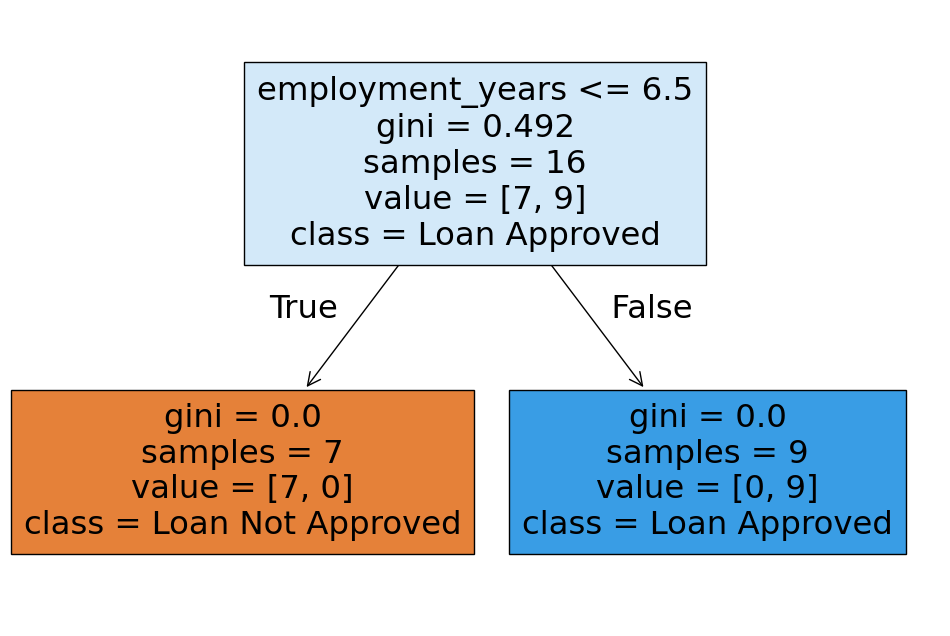

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Loan Not Approved', 'Loan Approved'], filled=True)
plt.show()

In [95]:
#It shows that out of 16 samples which were taken due to  a specified test size of '0.3',
#9 out of 16  people  were given the approval for the loan due to having more than 6.5 employment